# Speed tests for different implementation of the loop over dipole parameters

The goal of this notebook is to test the different implementation of the loop over all dipole parameters. 

## 0. Importing packages and defining parameters

In [1]:
import numpy as np
import time
import pyRaven as rav

These are the parameters that matches the example dataset used in the tutorials. 

There are 3 observations, and the vsini is medium-high. 

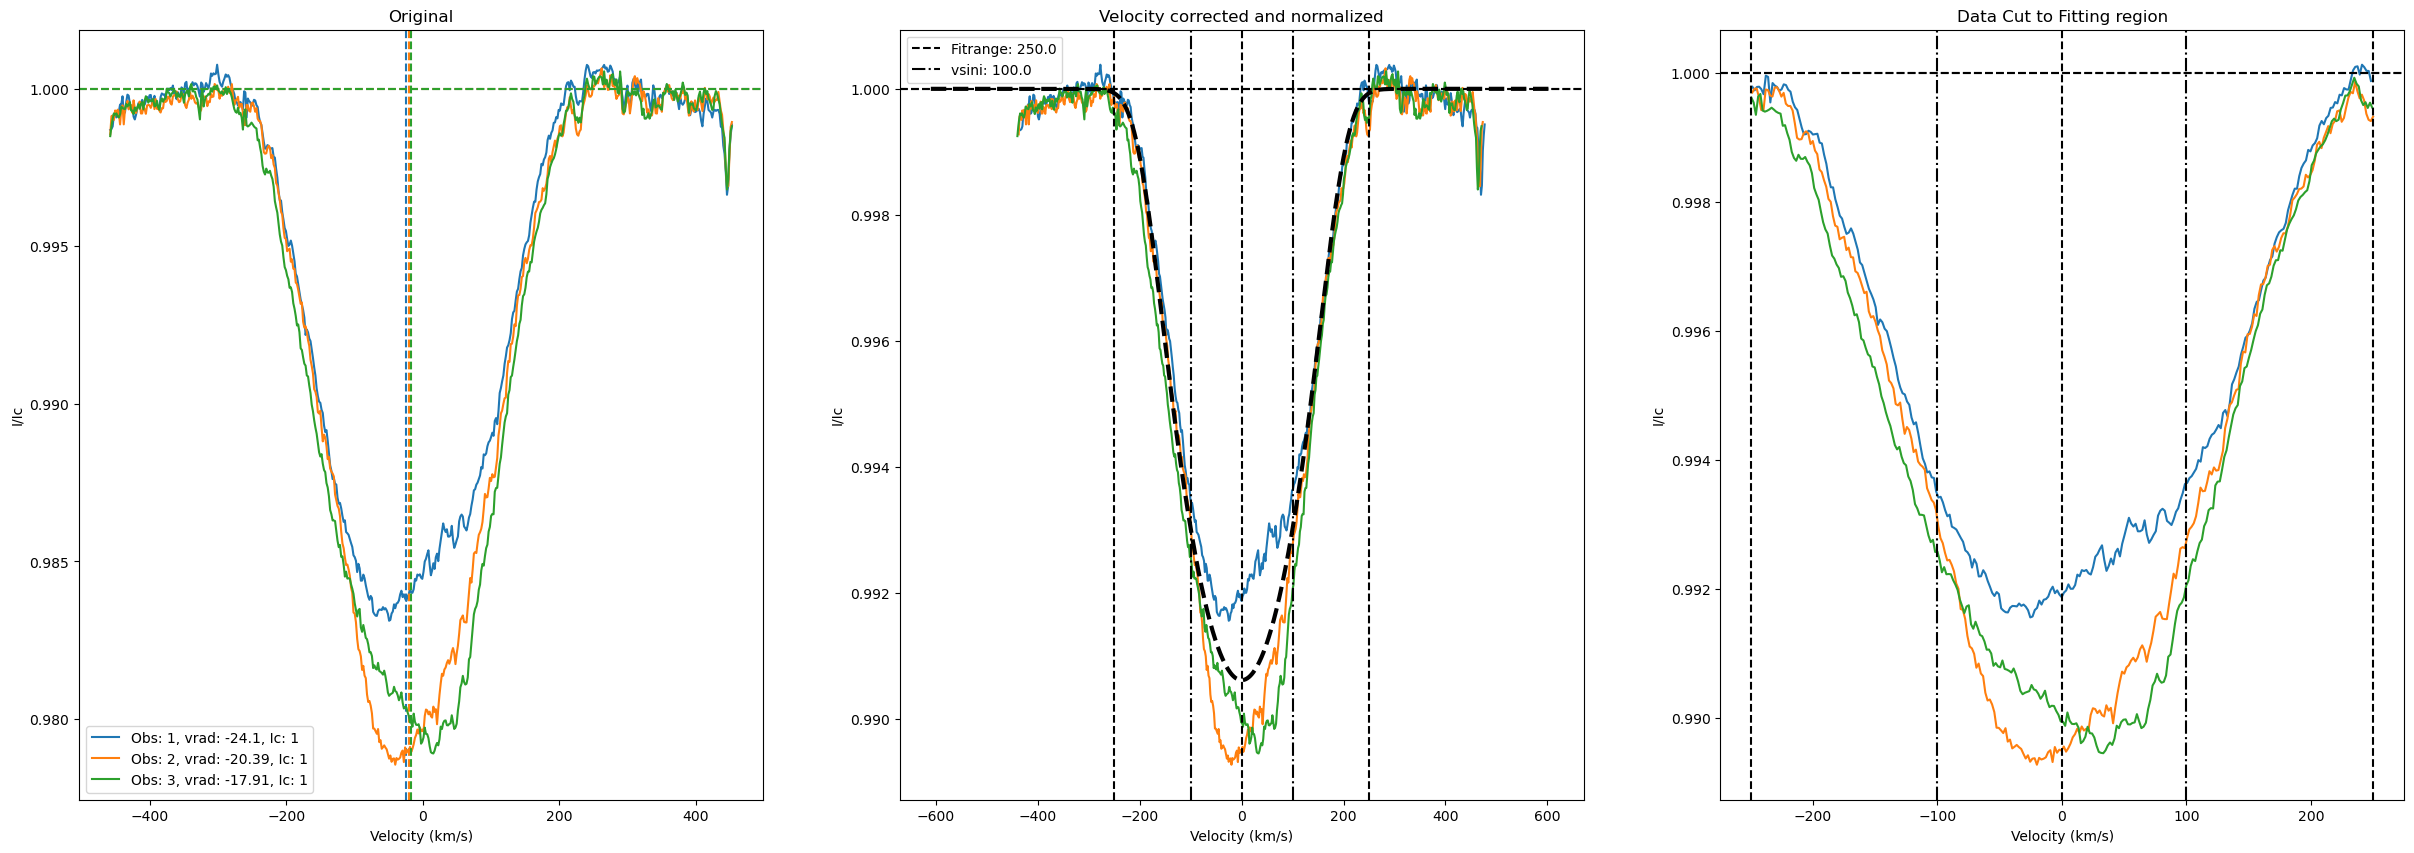

In [3]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':200.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':1000,
    'incl':90.0,
    'beta':90.0,
    'phase':0.0
  }

weakparam = {
        'geff':1.0
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.array([10]),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam
       }

Packet = rav.data.read_packet('ExampleData/ExamplePacket.h5')
model = rav.diskint2.numerical(param)
fig, ax = Packet.plotI()
ax[1].plot(model['vel'], model['flux'], c='k', ls='--', lw=3)

## Speed test

In [4]:
tic=time.time()
rav.loop_speed.loop_speed(param, Packet, path='ExampleData/LoopOutputs/')
toc = time.time()
print(toc-tic)

Using 9000.0 grid point on the surface
Max velocity needed: 30.0 vdop
Number of wavelength/velocity grid points: 621
Starting inclination loop 0/1


FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'ExampleData/LoopOutputs/chiV_i0obs0.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 602)